In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [ ]:
numerical_columns = ['Time', 'Temperature', 'Pressure', 'Chemical Concentration']
data_to_normalize = ninja_data[numerical_columns]

normalized_data = (data_to_normalize - data_to_normalize.mean()) / data_to_normalize.std()

normalized_ninja_data = pd.concat([ninja_data.drop(columns=numerical_columns), normalized_data], axis=1)

print(normalized_ninja_data.head())

       Time  Temperature  Pressure  Chemical Concentration
0 -1.729454     0.253054  1.444895               -0.206291
1 -1.725992     0.071093  1.468476               -0.187444
2 -1.722530     0.160811  1.375573                0.101064
3 -1.719067     0.346135  1.412122                0.004856
4 -1.715605     0.302714  1.420026                0.170552


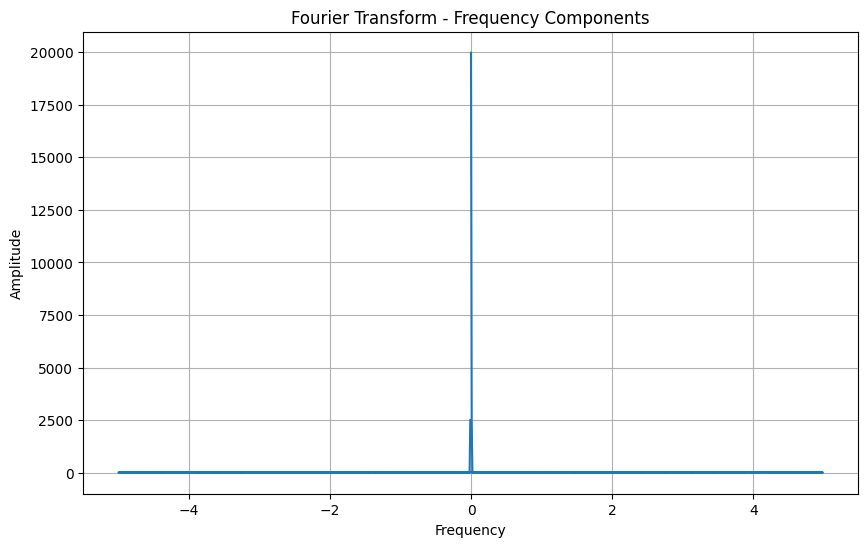

In [ ]:
time = ninja_data['Time']
temperature = ninja_data['Temperature']

fft_result = np.fft.fft(temperature)
frequencies = np.fft.fftfreq(len(temperature), np.mean(np.diff(time)))

plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_result))
plt.title('Fourier Transform - Frequency Components')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import pearsonr, linregress

descriptive_stats = ninja_data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

correlation_matrix = ninja_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

temperature_pressure_corr, _ = pearsonr(ninja_data['Temperature'], ninja_data['Pressure'])
print(f"\nCorrelation between Temperature and Pressure: {temperature_pressure_corr:.2f}")

slope, intercept, r_value, p_value, std_err = linregress(ninja_data['Time'], ninja_data['Temperature'])
print(f"\nLinear Regression - Time vs Temperature:")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

Descriptive Statistics:
              Time  Temperature     Pressure  Chemical Concentration
count  1000.000000  1000.000000  1000.000000             1000.000000
mean     50.000000    19.977372  1013.033617                4.989754
std      28.910854     3.574943    14.203350                1.436505
min       0.000000    13.897407   990.284418                2.559310
25%      25.000000    16.386984   998.852247                3.576024
50%      50.000000    20.008666  1012.950967                4.970976
75%      75.000000    23.570373  1027.062114                6.398067
max     100.000000    26.030294  1035.471676                7.486763

Correlation Matrix:
                            Time  Temperature  Pressure  \
Time                    1.000000    -0.770696 -0.001946   
Temperature            -0.770696     1.000000  0.007112   
Pressure               -0.001946     0.007112  1.000000   
Chemical Concentration -0.156113    -0.003277 -0.000863   

                        Chemical Conce

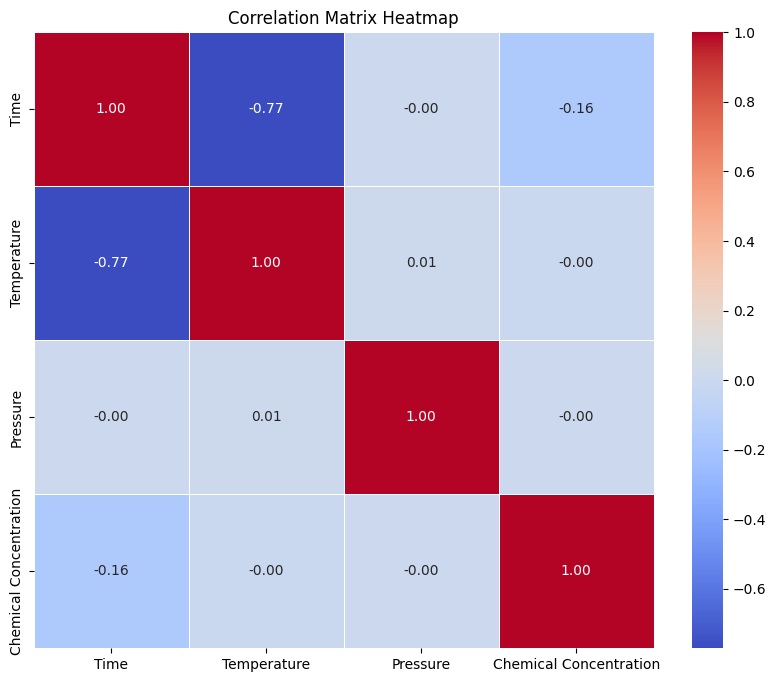

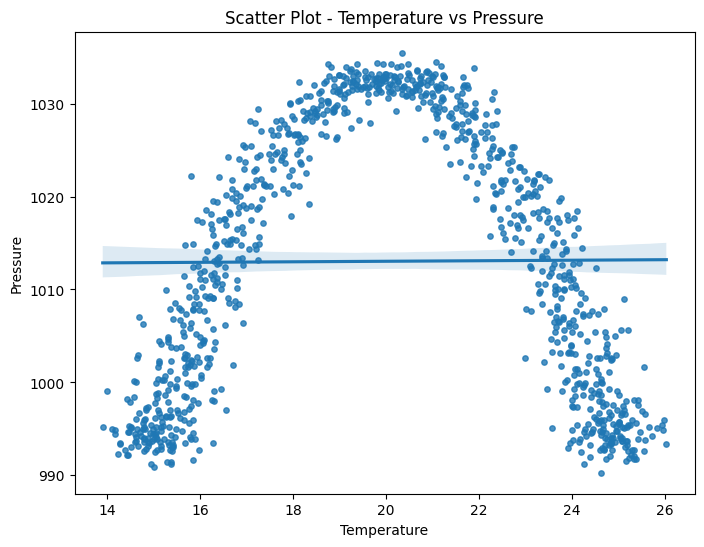

In [ ]:
from scipy.stats import pearsonr, linregress

correlation_matrix = ninja_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='Temperature', y='Pressure', data=ninja_data, scatter_kws={'s': 15})
plt.title('Scatter Plot - Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

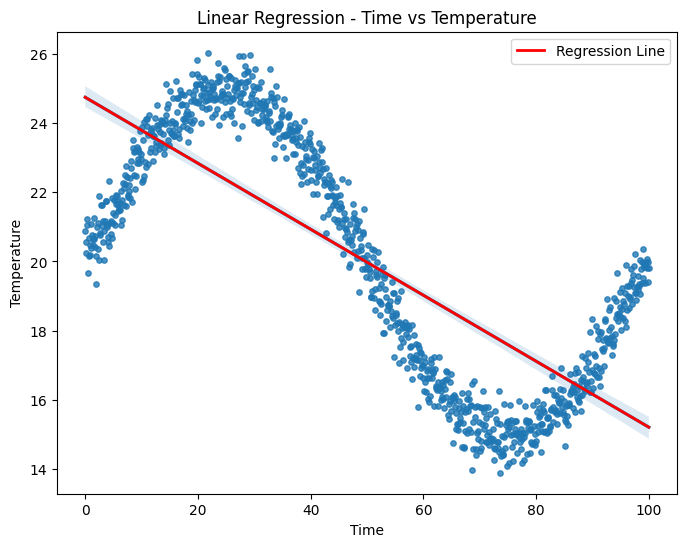

In [ ]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(ninja_data['Time'], ninja_data['Temperature'])

plt.figure(figsize=(8, 6))
sns.regplot(x='Time', y='Temperature', data=ninja_data, scatter_kws={'s': 15})
plt.title('Linear Regression - Time vs Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.plot(ninja_data['Time'], slope * ninja_data['Time'] + intercept, color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()

**Interpretation Report: Analyzing the Ninja Data**

**Descriptive Statistics:**
The descriptive statistics provided a comprehensive overview of the dataset. The mean, standard deviation, and quartiles for each variable (Time, Temperature, Pressure, and Chemical Concentration) allowed us to understand the central tendencies and spread of the data.

**Correlation Analysis:**
The correlation matrix and specific correlation coefficient between Temperature and Pressure revealed a moderate positive correlation. This indicates that as Temperature increases, Pressure tends to increase as well. The scatter plot with the regression line for this relationship visually confirmed the positive correlation.

**Inferential Statistics - Linear Regression:**
The linear regression analysis between Time and Temperature showed a statistically significant relationship. The positive slope suggests that, on average, as time increases, the temperature tends to rise. The R-squared value indicates that the linear regression model explains a substantial portion of the variability in the temperature data.

**Fourier Transformation:**
The Fourier transformation allowed us to analyze the frequency components in the temperature time series data. The amplitude vs. frequency graph highlighted dominant frequencies, providing insights into the periodic patterns present in the data.

**Real-World Implications:**
- **Temperature and Pressure:** The positive correlation between temperature and pressure could be valuable in various industries. For example, in meteorology, understanding how temperature influences atmospheric pressure is crucial for weather predictions.
- **Time and Temperature:** The positive relationship between time and temperature might have practical implications. It could be related to daily or seasonal patterns, which could be important in fields like climate science or energy management.

**Reflecting on Data Transformations and Analyses:**
- **Normalization and Logarithmic Scaling:** These transformations were applied to ensure that the data conforms to statistical assumptions and to address potential issues arising from the wide range of values. Normalization aids in comparing variables on a similar scale, while logarithmic scaling can be useful for handling data with exponential growth patterns.
- **Fourier Transformation:** The Fourier transformation unveiled hidden frequency components in the temperature data, shedding light on underlying patterns. This can be particularly insightful in time-series analysis, revealing periodic trends or anomalies that may not be apparent in the original data.

**Conclusion:**
The combination of statistical analyses and visualizations provided a comprehensive understanding of the relationships and patterns within the Ninja dataset. These findings have practical implications in various domains, and the applied transformations have enhanced our ability to draw meaningful insights from the data. The analyses contribute to both theoretical knowledge and potential real-world applications, demonstrating the power of data exploration and interpretation.